In [1]:
import pandas as pd
import numpy as np
from pandas_profiling import ProfileReport
import dabl
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import GradientBoostingClassifier
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [2]:
df=pd.read_excel("Stocks prediction.xlsx")

In [3]:
df

,DATE,ICICI O,ICICI H,ICICI L,ICICI C,ICICI W,HDFC O,HDFC H,HDCF L,HDFC C,HDFC W,RATIO
0,2021-01-29,536.0,544.80,529.85,537.00,535.974405,1394.45,1408.80,1364.65,1390.80,1387.801053,5455.474130
1,2021-02-01,550.2,609.50,550.20,603.95,583.077238,1400.00,1482.00,1400.00,1477.20,1442.222632,5799.831452
2,2021-02-02,613.4,623.90,598.70,617.25,613.029164,1500.00,1578.00,1498.80,1560.40,1555.738709,6176.623238
3,2021-02-03,623.0,627.50,614.00,622.25,622.153737,1578.40,1581.40,1542.20,1575.20,1564.272151,6239.312989
4,2021-02-04,618.0,631.50,609.00,627.50,620.951942,1564.15,1587.80,1543.45,1578.15,1568.398190,6241.556088
...,...,...,...,...,...,...,...,...,...,...,...,...
65,2021-05-07,612.0,614.70,603.75,606.75,608.623598,1407.00,1424.50,1407.00,1414.60,1419.261447,5881.640885
66,2021-05-10,608.6,617.10,608.60,613.10,614.241857,1426.00,1429.15,1413.05,1419.30,1419.424121,5910.057527
67,2021-05-11,607.5,612.80,603.65,609.75,609.021847,1397.90,1424.00,1396.95,1403.70,1408.439507,5861.988251
68,2021-05-12,604.7,606.60,593.60,594.95,599.200909,1403.00,1408.90,1389.05,1399.50,1397.978687,5791.961917


In [4]:
df.set_index("DATE").head()

,ICICI O,ICICI H,ICICI L,ICICI C,ICICI W,HDFC O,HDFC H,HDCF L,HDFC C,HDFC W,RATIO
DATE,,,,,,,,,,,
2021-01-29,536.0,544.8,529.85,537.00,535.974405,1394.45,1408.8,1364.65,1390.80,1387.801053,5455.474130
2021-02-01,550.2,609.5,550.20,603.95,583.077238,1400.00,1482.0,1400.00,1477.20,1442.222632,5799.831452
2021-02-02,613.4,623.9,598.70,617.25,613.029164,1500.00,1578.0,1498.80,1560.40,1555.738709,6176.623238
2021-02-03,623.0,627.5,614.00,622.25,622.153737,1578.40,1581.4,1542.20,1575.20,1564.272151,6239.312989
2021-02-04,618.0,631.5,609.00,627.50,620.951942,1564.15,1587.8,1543.45,1578.15,1568.398190,6241.556088


In [5]:
df.describe()

,ICICI O,ICICI H,ICICI L,ICICI C,ICICI W,HDFC O,HDFC H,HDCF L,HDFC C,HDFC W,RATIO
count,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000,70.000000
mean,601.549286,610.268571,591.302143,601.667857,601.042991,1496.503571,1515.267857,1475.560000,1494.575000,1495.216880,5995.648714
std,28.844503,28.176085,28.523478,28.102183,28.028221,76.236550,76.949700,73.733422,74.140163,75.500966,274.332361
min,536.000000,544.800000,529.850000,537.000000,535.974405,1369.000000,1398.700000,1353.100000,1366.600000,1374.391739,5455.474130
25%,581.100000,588.987500,570.662500,578.700000,578.562142,1417.000000,1435.287500,1405.425000,1421.750000,1421.711063,5786.930233
50%,605.450000,610.875000,591.550000,602.950000,604.769096,1498.550000,1508.875000,1474.175000,1492.875000,1487.898335,5925.681430
75%,619.800000,630.112500,609.000000,621.212500,621.583658,1567.262500,1580.550000,1539.987500,1557.975000,1560.189682,6232.267647
max,674.500000,679.300000,652.000000,674.000000,666.003989,1625.000000,1650.000000,1608.100000,1626.600000,1624.673286,6553.389286


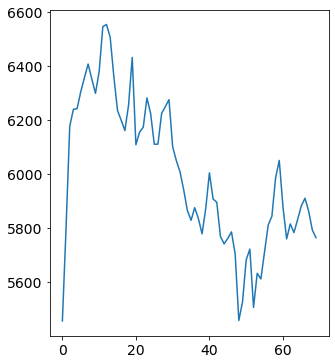

In [6]:
df["RATIO"].plot(figsize=(5,6))

In [7]:
df["M5"]=df["RATIO"].rolling(5).mean()
df["M20"]=df["RATIO"].rolling(20).mean()
df["STD20"]=df["RATIO"].rolling(20).std()

In [8]:
df

,DATE,ICICI O,ICICI H,ICICI L,ICICI C,ICICI W,HDFC O,HDFC H,HDCF L,HDFC C,HDFC W,RATIO,M5,M20,STD20
0,2021-01-29,536.0,544.80,529.85,537.00,535.974405,1394.45,1408.80,1364.65,1390.80,1387.801053,5455.474130,NaN,NaN,NaN
1,2021-02-01,550.2,609.50,550.20,603.95,583.077238,1400.00,1482.00,1400.00,1477.20,1442.222632,5799.831452,NaN,NaN,NaN
2,2021-02-02,613.4,623.90,598.70,617.25,613.029164,1500.00,1578.00,1498.80,1560.40,1555.738709,6176.623238,NaN,NaN,NaN
3,2021-02-03,623.0,627.50,614.00,622.25,622.153737,1578.40,1581.40,1542.20,1575.20,1564.272151,6239.312989,NaN,NaN,NaN
4,2021-02-04,618.0,631.50,609.00,627.50,620.951942,1564.15,1587.80,1543.45,1578.15,1568.398190,6241.556088,5982.559580,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2021-05-07,612.0,614.70,603.75,606.75,608.623598,1407.00,1424.50,1407.00,1414.60,1419.261447,5881.640885,5813.967717,5748.750487,152.719720
66,2021-05-10,608.6,617.10,608.60,613.10,614.241857,1426.00,1429.15,1413.05,1419.30,1419.424121,5910.057527,5844.139648,5754.990713,156.785415
67,2021-05-11,607.5,612.80,603.65,609.75,609.021847,1397.90,1424.00,1396.95,1403.70,1408.439507,5861.988251,5853.584786,5762.881747,158.059245
68,2021-05-12,604.7,606.60,593.60,594.95,599.200909,1403.00,1408.90,1389.05,1399.50,1397.978687,5791.961917,5855.417940,5779.612554,140.781056


In [9]:
df=df.dropna()

In [10]:
df

,DATE,ICICI O,ICICI H,ICICI L,ICICI C,ICICI W,HDFC O,HDFC H,HDCF L,HDFC C,HDFC W,RATIO,M5,M20,STD20
19,2021-02-25,640.15,648.35,626.55,627.95,637.448884,1622.00,1635.80,1601.40,1605.75,1621.928783,6431.101984,6255.900441,6262.710374,251.858315
20,2021-02-26,615.50,615.55,591.05,597.60,604.492925,1583.10,1588.15,1521.50,1534.35,1542.805231,6108.075087,6230.543052,6295.340422,171.096606
21,2021-03-01,606.00,611.75,600.40,608.15,606.707050,1568.30,1573.00,1541.15,1558.70,1560.381937,6154.299122,6221.678585,6313.063806,130.643764
22,2021-03-02,612.40,616.15,598.95,610.50,607.918793,1578.00,1587.00,1550.90,1566.40,1566.734751,6173.063466,6224.167490,6312.885817,130.841708
23,2021-03-03,616.20,633.50,613.75,631.85,623.499842,1582.00,1595.70,1565.45,1586.45,1581.899861,6281.298931,6229.567718,6314.985114,129.932802
24,2021-03-04,620.40,630.60,615.70,620.90,624.458683,1550.00,1570.70,1540.00,1553.20,1551.095537,6224.484491,6188.244219,6314.131534,130.495432
25,2021-03-05,615.00,615.00,601.50,609.70,608.821119,1531.80,1545.45,1520.65,1529.65,1532.854094,6109.813784,6188.591959,6304.403246,138.280788
26,2021-03-08,612.55,615.95,601.55,608.15,609.204305,1541.00,1555.50,1512.65,1519.40,1532.262579,6110.546684,6179.841471,6292.091299,144.206490
27,2021-03-09,613.10,628.00,613.10,625.20,621.794230,1540.00,1565.00,1539.95,1562.65,1557.513563,6223.998275,6190.028433,6282.951475,142.334626
28,2021-03-10,630.40,630.40,621.70,625.75,625.942235,1570.00,1575.35,1552.45,1555.80,1559.612918,6248.937010,6183.556049,6277.808025,141.572132


In [11]:
df.shape

(51, 15)

In [12]:
for col in df:
    col = (df["M5"] - df["M20"])/df["STD20"]

In [13]:
col.dtype

dtype('float64')

In [14]:
col.shape

(51,)

In [15]:
col

19   -0.027039
20   -0.378718
21   -0.699499
22   -0.678058
23   -0.657397
24   -0.964688
25   -0.837508
26   -0.778397
27   -0.652849
28   -0.665752
29   -0.586542
30   -0.490548
31   -0.429722
32   -0.602534
33   -0.922915
34   -1.279911
35   -1.355634
36   -1.385169
37   -1.394305
38   -1.358248
39   -1.298716
40   -1.056475
41   -0.938308
42   -0.784596
43   -0.652099
44   -0.664025
45   -0.838394
46   -0.887802
47   -1.000096
48   -1.075085
49   -1.186025
50   -1.228499
51   -1.285972
52   -1.339845
53   -1.009635
54   -0.793990
55   -0.717261
56   -0.579768
57   -0.099772
58    0.307051
59    0.766342
60    1.060065
61    1.072069
62    1.083575
63    0.803970
64    0.473570
65    0.427039
66    0.568605
67    0.573855
68    0.538463
69    0.394984
dtype: float64

In [16]:
df['ZSCORE'] = col

In [17]:
df

,DATE,ICICI O,ICICI H,ICICI L,ICICI C,ICICI W,HDFC O,HDFC H,HDCF L,HDFC C,HDFC W,RATIO,M5,M20,STD20,ZSCORE
19,2021-02-25,640.15,648.35,626.55,627.95,637.448884,1622.00,1635.80,1601.40,1605.75,1621.928783,6431.101984,6255.900441,6262.710374,251.858315,-0.027039
20,2021-02-26,615.50,615.55,591.05,597.60,604.492925,1583.10,1588.15,1521.50,1534.35,1542.805231,6108.075087,6230.543052,6295.340422,171.096606,-0.378718
21,2021-03-01,606.00,611.75,600.40,608.15,606.707050,1568.30,1573.00,1541.15,1558.70,1560.381937,6154.299122,6221.678585,6313.063806,130.643764,-0.699499
22,2021-03-02,612.40,616.15,598.95,610.50,607.918793,1578.00,1587.00,1550.90,1566.40,1566.734751,6173.063466,6224.167490,6312.885817,130.841708,-0.678058
23,2021-03-03,616.20,633.50,613.75,631.85,623.499842,1582.00,1595.70,1565.45,1586.45,1581.899861,6281.298931,6229.567718,6314.985114,129.932802,-0.657397
24,2021-03-04,620.40,630.60,615.70,620.90,624.458683,1550.00,1570.70,1540.00,1553.20,1551.095537,6224.484491,6188.244219,6314.131534,130.495432,-0.964688
25,2021-03-05,615.00,615.00,601.50,609.70,608.821119,1531.80,1545.45,1520.65,1529.65,1532.854094,6109.813784,6188.591959,6304.403246,138.280788,-0.837508
26,2021-03-08,612.55,615.95,601.55,608.15,609.204305,1541.00,1555.50,1512.65,1519.40,1532.262579,6110.546684,6179.841471,6292.091299,144.206490,-0.778397
27,2021-03-09,613.10,628.00,613.10,625.20,621.794230,1540.00,1565.00,1539.95,1562.65,1557.513563,6223.998275,6190.028433,6282.951475,142.334626,-0.652849
28,2021-03-10,630.40,630.40,621.70,625.75,625.942235,1570.00,1575.35,1552.45,1555.80,1559.612918,6248.937010,6183.556049,6277.808025,141.572132,-0.665752


In [18]:
conditions = [
    (df['ZSCORE'] >=1),
    (df['ZSCORE'] <=1) & (df['ZSCORE'] >= -1),
    (df['ZSCORE'] <=-1)
    ]

In [19]:
values = ['sell', 'Wait','Buy']
df['Trade'] = np.select(conditions, values)
df

,DATE,ICICI O,ICICI H,ICICI L,ICICI C,ICICI W,HDFC O,HDFC H,HDCF L,HDFC C,HDFC W,RATIO,M5,M20,STD20,ZSCORE,Trade
19,2021-02-25,640.15,648.35,626.55,627.95,637.448884,1622.00,1635.80,1601.40,1605.75,1621.928783,6431.101984,6255.900441,6262.710374,251.858315,-0.027039,Wait
20,2021-02-26,615.50,615.55,591.05,597.60,604.492925,1583.10,1588.15,1521.50,1534.35,1542.805231,6108.075087,6230.543052,6295.340422,171.096606,-0.378718,Wait
21,2021-03-01,606.00,611.75,600.40,608.15,606.707050,1568.30,1573.00,1541.15,1558.70,1560.381937,6154.299122,6221.678585,6313.063806,130.643764,-0.699499,Wait
22,2021-03-02,612.40,616.15,598.95,610.50,607.918793,1578.00,1587.00,1550.90,1566.40,1566.734751,6173.063466,6224.167490,6312.885817,130.841708,-0.678058,Wait
23,2021-03-03,616.20,633.50,613.75,631.85,623.499842,1582.00,1595.70,1565.45,1586.45,1581.899861,6281.298931,6229.567718,6314.985114,129.932802,-0.657397,Wait
24,2021-03-04,620.40,630.60,615.70,620.90,624.458683,1550.00,1570.70,1540.00,1553.20,1551.095537,6224.484491,6188.244219,6314.131534,130.495432,-0.964688,Wait
25,2021-03-05,615.00,615.00,601.50,609.70,608.821119,1531.80,1545.45,1520.65,1529.65,1532.854094,6109.813784,6188.591959,6304.403246,138.280788,-0.837508,Wait
26,2021-03-08,612.55,615.95,601.55,608.15,609.204305,1541.00,1555.50,1512.65,1519.40,1532.262579,6110.546684,6179.841471,6292.091299,144.206490,-0.778397,Wait
27,2021-03-09,613.10,628.00,613.10,625.20,621.794230,1540.00,1565.00,1539.95,1562.65,1557.513563,6223.998275,6190.028433,6282.951475,142.334626,-0.652849,Wait
28,2021-03-10,630.40,630.40,621.70,625.75,625.942235,1570.00,1575.35,1552.45,1555.80,1559.612918,6248.937010,6183.556049,6277.808025,141.572132,-0.665752,Wait


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51 entries, 19 to 69
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     51 non-null     datetime64[ns]
 1   ICICI O  51 non-null     float64       
 2   ICICI H  51 non-null     float64       
 3   ICICI L  51 non-null     float64       
 4   ICICI C  51 non-null     float64       
 5   ICICI W  51 non-null     float64       
 6   HDFC O   51 non-null     float64       
 7   HDFC H   51 non-null     float64       
 8   HDCF L   51 non-null     float64       
 9   HDFC C   51 non-null     float64       
 10  HDFC W   51 non-null     float64       
 11  RATIO    51 non-null     float64       
 12  M5       51 non-null     float64       
 13  M20      51 non-null     float64       
 14  STD20    51 non-null     float64       
 15  ZSCORE   51 non-null     float64       
 16  Trade    51 non-null     object        
dtypes: datetime64[ns](1), float64(15), o

In [21]:
df.skew()

ICICI O   -0.234885
ICICI H   -0.024684
ICICI L   -0.384783
ICICI C   -0.139357
ICICI W   -0.185167
HDFC O     0.363755
HDFC H     0.361008
HDCF L     0.407427
HDFC C     0.403388
HDFC W     0.423854
RATIO      0.336451
M5         0.260594
M20        0.210023
STD20      2.392252
ZSCORE     0.842348
dtype: float64

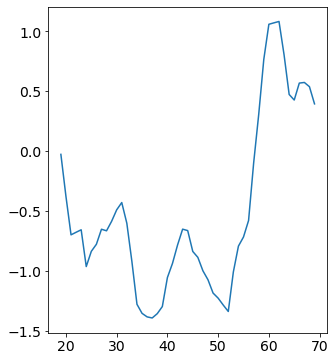

In [22]:
df["ZSCORE"].plot(figsize=(5,6))

Target looks like classification
Linear Discriminant Analysis training set score: 0.980


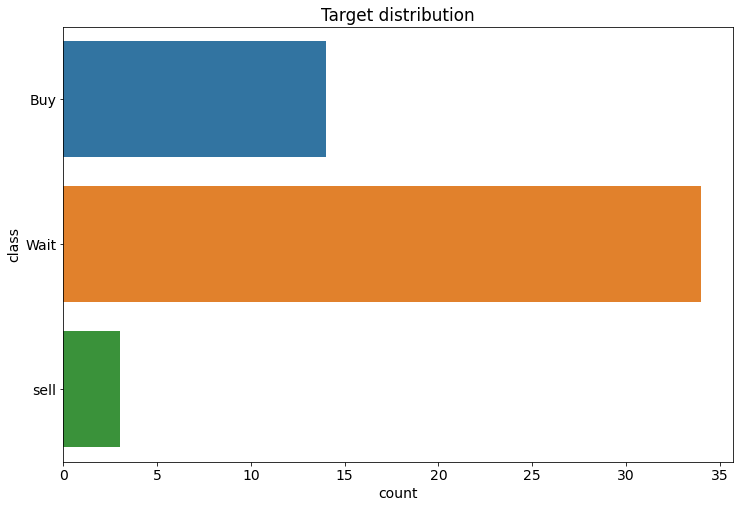

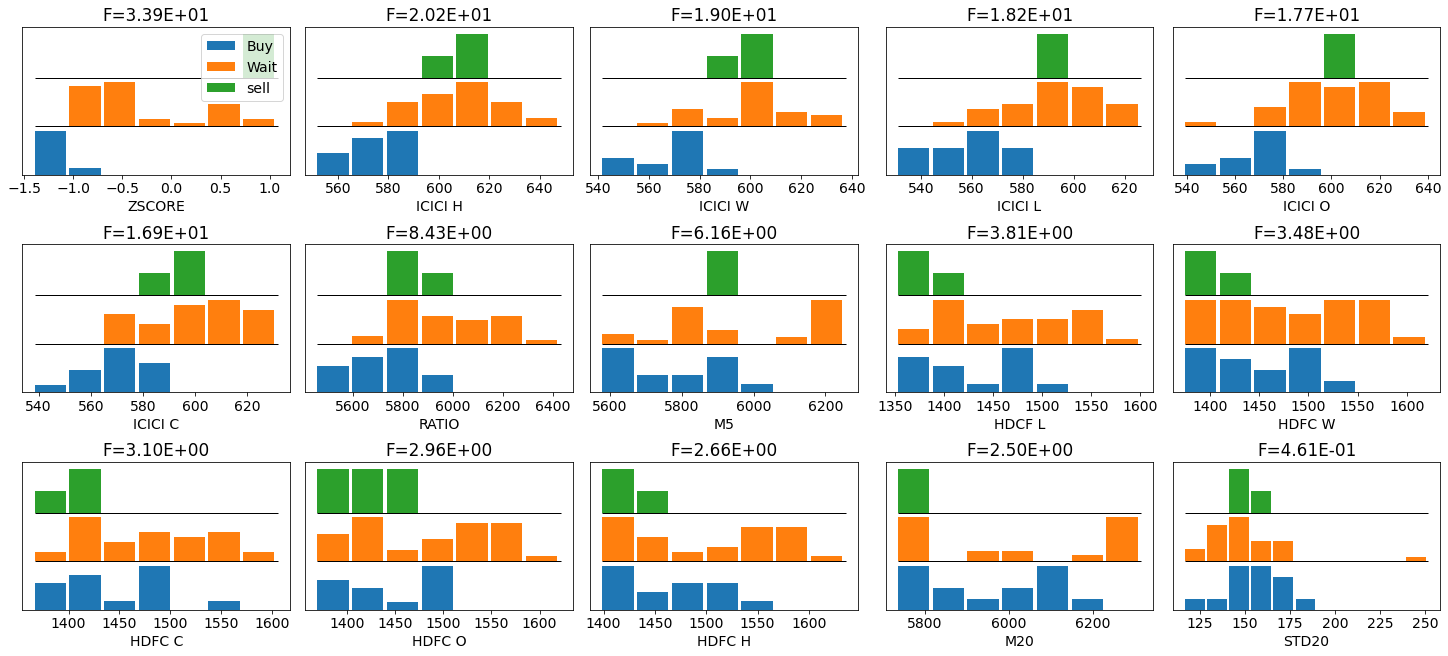

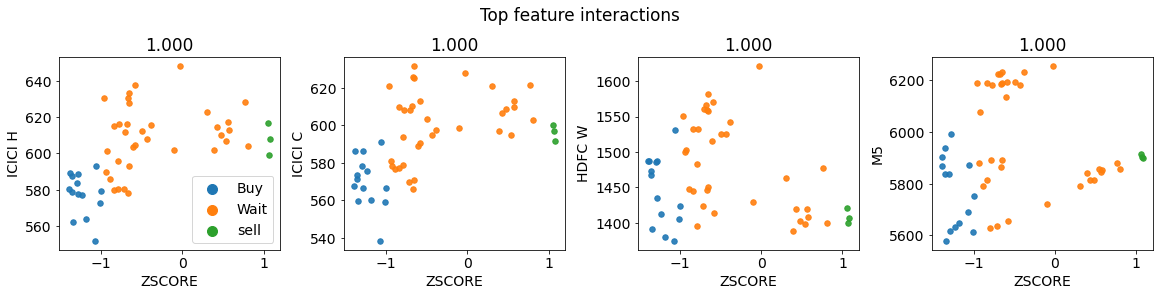

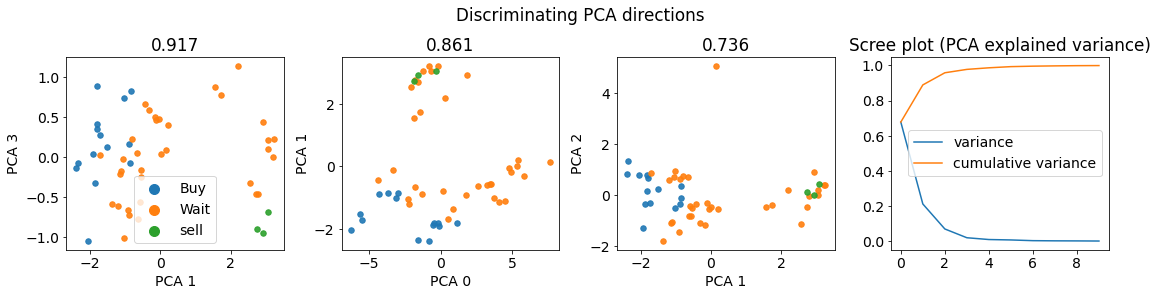

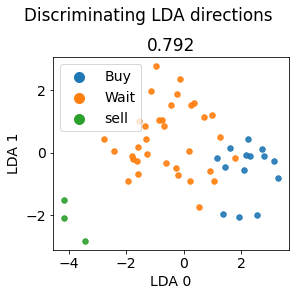

In [23]:
dabl.plot(df, target_col="Trade")

In [24]:
df['Trade'].value_counts(normalize=True).to_frame()

,Trade
Wait,0.666667
Buy,0.274510
sell,0.058824


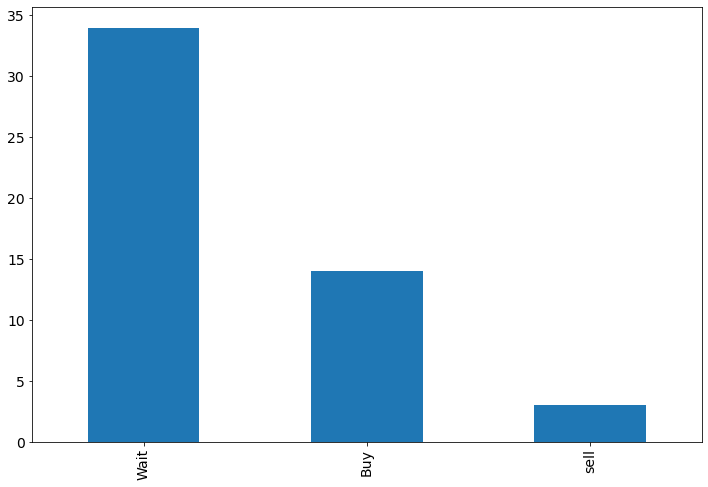

In [25]:
df["Trade"].value_counts().plot(kind="bar")

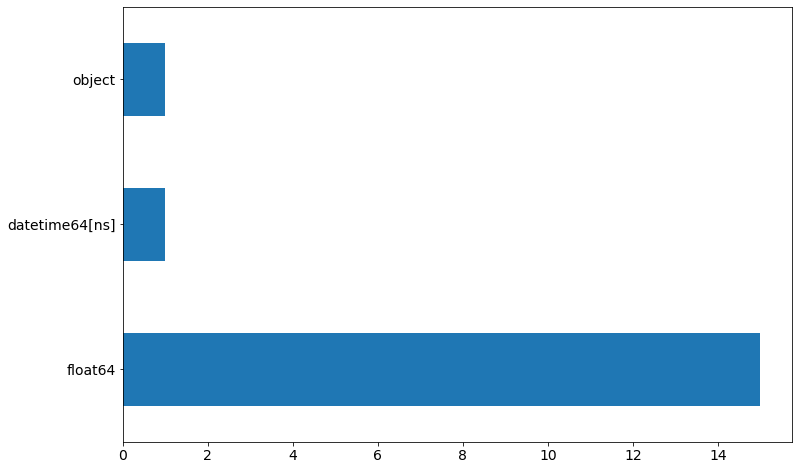

In [26]:
df.dtypes.value_counts().plot(kind = 'barh')

In [27]:
#sns.pairplot(df,hue="Trade",diag_kind="hist")
#plt.title('Scatter plot between variables')

In [28]:
df

,DATE,ICICI O,ICICI H,ICICI L,ICICI C,ICICI W,HDFC O,HDFC H,HDCF L,HDFC C,HDFC W,RATIO,M5,M20,STD20,ZSCORE,Trade
19,2021-02-25,640.15,648.35,626.55,627.95,637.448884,1622.00,1635.80,1601.40,1605.75,1621.928783,6431.101984,6255.900441,6262.710374,251.858315,-0.027039,Wait
20,2021-02-26,615.50,615.55,591.05,597.60,604.492925,1583.10,1588.15,1521.50,1534.35,1542.805231,6108.075087,6230.543052,6295.340422,171.096606,-0.378718,Wait
21,2021-03-01,606.00,611.75,600.40,608.15,606.707050,1568.30,1573.00,1541.15,1558.70,1560.381937,6154.299122,6221.678585,6313.063806,130.643764,-0.699499,Wait
22,2021-03-02,612.40,616.15,598.95,610.50,607.918793,1578.00,1587.00,1550.90,1566.40,1566.734751,6173.063466,6224.167490,6312.885817,130.841708,-0.678058,Wait
23,2021-03-03,616.20,633.50,613.75,631.85,623.499842,1582.00,1595.70,1565.45,1586.45,1581.899861,6281.298931,6229.567718,6314.985114,129.932802,-0.657397,Wait
24,2021-03-04,620.40,630.60,615.70,620.90,624.458683,1550.00,1570.70,1540.00,1553.20,1551.095537,6224.484491,6188.244219,6314.131534,130.495432,-0.964688,Wait
25,2021-03-05,615.00,615.00,601.50,609.70,608.821119,1531.80,1545.45,1520.65,1529.65,1532.854094,6109.813784,6188.591959,6304.403246,138.280788,-0.837508,Wait
26,2021-03-08,612.55,615.95,601.55,608.15,609.204305,1541.00,1555.50,1512.65,1519.40,1532.262579,6110.546684,6179.841471,6292.091299,144.206490,-0.778397,Wait
27,2021-03-09,613.10,628.00,613.10,625.20,621.794230,1540.00,1565.00,1539.95,1562.65,1557.513563,6223.998275,6190.028433,6282.951475,142.334626,-0.652849,Wait
28,2021-03-10,630.40,630.40,621.70,625.75,625.942235,1570.00,1575.35,1552.45,1555.80,1559.612918,6248.937010,6183.556049,6277.808025,141.572132,-0.665752,Wait


In [29]:
df.drop(columns=['Trade'])

,DATE,ICICI O,ICICI H,ICICI L,ICICI C,ICICI W,HDFC O,HDFC H,HDCF L,HDFC C,HDFC W,RATIO,M5,M20,STD20,ZSCORE
19,2021-02-25,640.15,648.35,626.55,627.95,637.448884,1622.00,1635.80,1601.40,1605.75,1621.928783,6431.101984,6255.900441,6262.710374,251.858315,-0.027039
20,2021-02-26,615.50,615.55,591.05,597.60,604.492925,1583.10,1588.15,1521.50,1534.35,1542.805231,6108.075087,6230.543052,6295.340422,171.096606,-0.378718
21,2021-03-01,606.00,611.75,600.40,608.15,606.707050,1568.30,1573.00,1541.15,1558.70,1560.381937,6154.299122,6221.678585,6313.063806,130.643764,-0.699499
22,2021-03-02,612.40,616.15,598.95,610.50,607.918793,1578.00,1587.00,1550.90,1566.40,1566.734751,6173.063466,6224.167490,6312.885817,130.841708,-0.678058
23,2021-03-03,616.20,633.50,613.75,631.85,623.499842,1582.00,1595.70,1565.45,1586.45,1581.899861,6281.298931,6229.567718,6314.985114,129.932802,-0.657397
24,2021-03-04,620.40,630.60,615.70,620.90,624.458683,1550.00,1570.70,1540.00,1553.20,1551.095537,6224.484491,6188.244219,6314.131534,130.495432,-0.964688
25,2021-03-05,615.00,615.00,601.50,609.70,608.821119,1531.80,1545.45,1520.65,1529.65,1532.854094,6109.813784,6188.591959,6304.403246,138.280788,-0.837508
26,2021-03-08,612.55,615.95,601.55,608.15,609.204305,1541.00,1555.50,1512.65,1519.40,1532.262579,6110.546684,6179.841471,6292.091299,144.206490,-0.778397
27,2021-03-09,613.10,628.00,613.10,625.20,621.794230,1540.00,1565.00,1539.95,1562.65,1557.513563,6223.998275,6190.028433,6282.951475,142.334626,-0.652849
28,2021-03-10,630.40,630.40,621.70,625.75,625.942235,1570.00,1575.35,1552.45,1555.80,1559.612918,6248.937010,6183.556049,6277.808025,141.572132,-0.665752


In [30]:
from sklearn.preprocessing import LabelEncoder 
labelencoder= LabelEncoder() 
df['Trade'] = labelencoder.fit_transform(df['Trade'])

In [31]:
df['year'] = pd.DatetimeIndex(df['DATE']).year 
df['month'] = pd.DatetimeIndex(df['DATE']).month 
df['day'] = pd.DatetimeIndex(df['DATE']).day

In [32]:
df=df.drop(['DATE'],axis=1)

In [33]:
df

,ICICI O,ICICI H,ICICI L,ICICI C,ICICI W,HDFC O,HDFC H,HDCF L,HDFC C,HDFC W,RATIO,M5,M20,STD20,ZSCORE,Trade,year,month,day
19,640.15,648.35,626.55,627.95,637.448884,1622.00,1635.80,1601.40,1605.75,1621.928783,6431.101984,6255.900441,6262.710374,251.858315,-0.027039,1,2021,2,25
20,615.50,615.55,591.05,597.60,604.492925,1583.10,1588.15,1521.50,1534.35,1542.805231,6108.075087,6230.543052,6295.340422,171.096606,-0.378718,1,2021,2,26
21,606.00,611.75,600.40,608.15,606.707050,1568.30,1573.00,1541.15,1558.70,1560.381937,6154.299122,6221.678585,6313.063806,130.643764,-0.699499,1,2021,3,1
22,612.40,616.15,598.95,610.50,607.918793,1578.00,1587.00,1550.90,1566.40,1566.734751,6173.063466,6224.167490,6312.885817,130.841708,-0.678058,1,2021,3,2
23,616.20,633.50,613.75,631.85,623.499842,1582.00,1595.70,1565.45,1586.45,1581.899861,6281.298931,6229.567718,6314.985114,129.932802,-0.657397,1,2021,3,3
24,620.40,630.60,615.70,620.90,624.458683,1550.00,1570.70,1540.00,1553.20,1551.095537,6224.484491,6188.244219,6314.131534,130.495432,-0.964688,1,2021,3,4
25,615.00,615.00,601.50,609.70,608.821119,1531.80,1545.45,1520.65,1529.65,1532.854094,6109.813784,6188.591959,6304.403246,138.280788,-0.837508,1,2021,3,5
26,612.55,615.95,601.55,608.15,609.204305,1541.00,1555.50,1512.65,1519.40,1532.262579,6110.546684,6179.841471,6292.091299,144.206490,-0.778397,1,2021,3,8
27,613.10,628.00,613.10,625.20,621.794230,1540.00,1565.00,1539.95,1562.65,1557.513563,6223.998275,6190.028433,6282.951475,142.334626,-0.652849,1,2021,3,9
28,630.40,630.40,621.70,625.75,625.942235,1570.00,1575.35,1552.45,1555.80,1559.612918,6248.937010,6183.556049,6277.808025,141.572132,-0.665752,1,2021,3,10


In [34]:
X=df.drop(['Trade'],axis=1)
Y=df['Trade']

In [35]:
X

,ICICI O,ICICI H,ICICI L,ICICI C,ICICI W,HDFC O,HDFC H,HDCF L,HDFC C,HDFC W,RATIO,M5,M20,STD20,ZSCORE,year,month,day
19,640.15,648.35,626.55,627.95,637.448884,1622.00,1635.80,1601.40,1605.75,1621.928783,6431.101984,6255.900441,6262.710374,251.858315,-0.027039,2021,2,25
20,615.50,615.55,591.05,597.60,604.492925,1583.10,1588.15,1521.50,1534.35,1542.805231,6108.075087,6230.543052,6295.340422,171.096606,-0.378718,2021,2,26
21,606.00,611.75,600.40,608.15,606.707050,1568.30,1573.00,1541.15,1558.70,1560.381937,6154.299122,6221.678585,6313.063806,130.643764,-0.699499,2021,3,1
22,612.40,616.15,598.95,610.50,607.918793,1578.00,1587.00,1550.90,1566.40,1566.734751,6173.063466,6224.167490,6312.885817,130.841708,-0.678058,2021,3,2
23,616.20,633.50,613.75,631.85,623.499842,1582.00,1595.70,1565.45,1586.45,1581.899861,6281.298931,6229.567718,6314.985114,129.932802,-0.657397,2021,3,3
24,620.40,630.60,615.70,620.90,624.458683,1550.00,1570.70,1540.00,1553.20,1551.095537,6224.484491,6188.244219,6314.131534,130.495432,-0.964688,2021,3,4
25,615.00,615.00,601.50,609.70,608.821119,1531.80,1545.45,1520.65,1529.65,1532.854094,6109.813784,6188.591959,6304.403246,138.280788,-0.837508,2021,3,5
26,612.55,615.95,601.55,608.15,609.204305,1541.00,1555.50,1512.65,1519.40,1532.262579,6110.546684,6179.841471,6292.091299,144.206490,-0.778397,2021,3,8
27,613.10,628.00,613.10,625.20,621.794230,1540.00,1565.00,1539.95,1562.65,1557.513563,6223.998275,6190.028433,6282.951475,142.334626,-0.652849,2021,3,9
28,630.40,630.40,621.70,625.75,625.942235,1570.00,1575.35,1552.45,1555.80,1559.612918,6248.937010,6183.556049,6277.808025,141.572132,-0.665752,2021,3,10


In [36]:
Y.head()

19    1
20    1
21    1
22    1
23    1
Name: Trade, dtype: int32

Class=1, n=34 (66.667%)
Class=0, n=14 (27.451%)
Class=2, n=3 (5.882%)


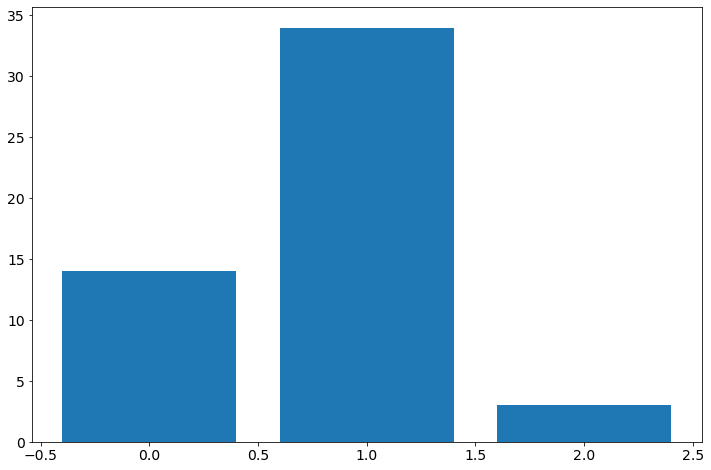

In [37]:
from collections import Counter
from matplotlib import pyplot

counter = Counter(Y)
for k,v in counter.items():
    per = v / len(Y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

Class=1, n=34 (33.333%)
Class=0, n=34 (33.333%)
Class=2, n=34 (33.333%)


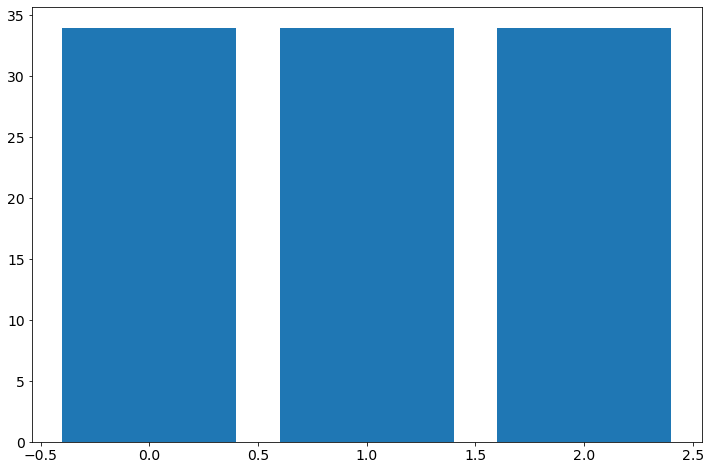

In [38]:
from imblearn.over_sampling import SMOTE
from collections import Counter
from matplotlib import pyplot

oversample = SMOTE(k_neighbors=2)
X, Y = oversample.fit_resample(X, Y)
counter = Counter(Y)
for k,v in counter.items():
    per = v / len(Y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
pyplot.bar(counter.keys(), counter.values())
pyplot.show()

In [39]:
Y.value_counts()

2    34
1    34
0    34
Name: Trade, dtype: int64

In [40]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,stratify=Y,test_size=0.25,random_state=0)

In [41]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(76, 18)
(26, 18)
(76,)
(26,)


In [42]:
x_train

,ICICI O,ICICI H,ICICI L,ICICI C,ICICI W,HDFC O,HDFC H,HDCF L,HDFC C,HDFC W,RATIO,M5,M20,STD20,ZSCORE,year,month,day
96,607.941098,616.071301,597.250664,599.486780,606.754156,1442.877323,1453.745148,1405.075065,1409.759587,1419.578332,5872.927443,5912.192673,5747.725322,154.809875,1.062491,2021,4,27
65,578.076553,589.464806,575.017818,586.597197,580.599728,1476.721388,1510.204430,1470.871295,1503.480867,1489.768168,5882.534974,5901.598699,6116.814786,157.686616,-1.365825,2021,3,23
88,597.130957,605.037087,588.492540,593.334295,597.602246,1409.089095,1422.457128,1381.888311,1396.587514,1404.279902,5796.571034,5899.651507,5738.814214,148.957511,1.079808,2021,5,3
53,578.738068,589.122375,574.220330,585.202428,579.788952,1476.880336,1506.157677,1468.575744,1497.708170,1486.002676,5870.950113,5906.370498,6122.503656,156.300158,-1.382656,2021,3,22
90,598.204023,600.179883,588.182479,597.231668,593.165486,1402.216094,1424.079105,1379.590720,1413.038676,1400.787857,5767.403145,5904.254979,5742.015221,151.451996,1.071251,2021,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,596.000000,604.250000,584.750000,602.650000,596.516577,1404.800000,1409.000000,1381.700000,1402.450000,1400.106632,5782.796147,5857.275520,5738.220290,148.084212,0.803970,2021,5,5
8,613.100000,628.000000,613.100000,625.200000,621.794230,1540.000000,1565.000000,1539.950000,1562.650000,1557.513563,6223.998275,6190.028433,6282.951475,142.334626,-0.652849,2021,3,9
43,597.000000,608.000000,589.000000,591.550000,600.272040,1414.000000,1422.850000,1384.000000,1388.550000,1406.701180,5814.762559,5897.752399,5737.501212,147.891157,1.083575,2021,5,4
32,575.000000,577.500000,564.000000,566.600000,570.058458,1435.000000,1444.950000,1423.400000,1428.450000,1435.577528,5721.447343,5618.016823,5797.697855,139.723891,-1.285972,2021,4,16


In [43]:
x_test

,ICICI O,ICICI H,ICICI L,ICICI C,ICICI W,HDFC O,HDFC H,HDCF L,HDFC C,HDFC W,RATIO,M5,M20,STD20,ZSCORE,year,month,day
0,640.150000,648.350000,626.550000,627.950000,637.448884,1622.000000,1635.800000,1601.400000,1605.750000,1621.928783,6431.101984,6255.900441,6262.710374,251.858315,-0.027039,2021,2,25
30,539.250000,563.700000,538.000000,560.450000,553.011658,1369.000000,1406.300000,1360.750000,1400.300000,1380.259654,5525.577600,5646.764590,5835.048120,158.751683,-1.186025,2021,4,13
69,574.485275,577.476170,563.540084,567.024172,570.128051,1433.379569,1444.580637,1421.929698,1428.531022,1434.452697,5719.545647,5618.625015,5798.479110,140.176300,-1.283233,2021,4,15
1,615.500000,615.550000,591.050000,597.600000,604.492925,1583.100000,1588.150000,1521.500000,1534.350000,1542.805231,6108.075087,6230.543052,6295.340422,171.096606,-0.378718,2021,2,26
71,597.059382,606.656490,588.769896,592.359075,599.061442,1411.773188,1422.671855,1383.042471,1392.194549,1405.603270,5806.513751,5898.613535,5738.096583,148.374687,1.081867,2021,5,3
95,597.387803,599.225947,587.497262,596.833822,592.365998,1399.457371,1421.686590,1377.746670,1412.351436,1399.531065,5760.892119,5903.376215,5741.389397,151.048946,1.072420,2021,5,3
46,612.000000,614.700000,603.750000,606.750000,608.623598,1407.000000,1424.500000,1407.000000,1414.600000,1419.261447,5881.640885,5813.967717,5748.750487,152.719720,0.427039,2021,5,7
26,568.400000,580.000000,560.000000,577.550000,574.331646,1437.350000,1456.500000,1422.050000,1447.350000,1444.910380,5761.478992,5814.572675,5954.354090,166.725145,-0.838394,2021,4,7
79,597.319105,600.780259,587.763470,595.897800,593.766543,1402.033578,1421.892686,1378.854439,1408.135043,1400.801241,5770.435195,5902.379964,5740.700610,150.489548,1.074396,2021,5,3
9,630.400000,630.400000,621.700000,625.750000,625.942235,1570.000000,1575.350000,1552.450000,1555.800000,1559.612918,6248.937010,6183.556049,6277.808025,141.572132,-0.665752,2021,3,10


In [44]:
y_train.head()

96    2
65    0
88    2
53    0
90    2
Name: Trade, dtype: int32

In [45]:
y_test.head()

0     1
30    0
69    0
1     1
71    2
Name: Trade, dtype: int32

In [46]:
Y.value_counts()

2    34
1    34
0    34
Name: Trade, dtype: int64

In [47]:
from collections import Counter
Counter(y_train)

Counter({2: 26, 0: 25, 1: 25})

In [48]:
from sklearn.neighbors import KNeighborsClassifier
for K in range(2):
    K_value = K+1
knn_model = KNeighborsClassifier(n_neighbors = K_value, weights='uniform', algorithm='auto')
knn_model.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=2)

In [49]:
knn_pred=knn_model.predict(x_test)
knn_pred
print("Accuracy is ", accuracy_score(y_test,knn_pred)*100,"% for K-Value:",K_value)

Accuracy is  96.15384615384616 % for K-Value: 2


In [50]:
print(knn_model.score(x_train,y_train))
print(knn_model.score(x_test,y_test))

0.9473684210526315
0.9615384615384616


In [51]:
from sklearn import metrics

In [52]:
print("Accuracy Score of KNN Model::")
print(metrics.accuracy_score(y_test,knn_pred))

Accuracy Score of KNN Model::
0.9615384615384616


In [53]:
print("\n","Classification Report::")
print(metrics.classification_report(y_test,knn_pred),'\n')


 Classification Report::
              precision    recall  f1-score   support

           0       1.00      0.89      0.94         9
           1       0.90      1.00      0.95         9
           2       1.00      1.00      1.00         8

    accuracy                           0.96        26
   macro avg       0.97      0.96      0.96        26
weighted avg       0.97      0.96      0.96        26
 



In [54]:
from sklearn.metrics import confusion_matrix
print ("Confusion matrix")
print (confusion_matrix(y_test,knn_pred))

Confusion matrix
[[8 1 0]
 [0 9 0]
 [0 0 8]]


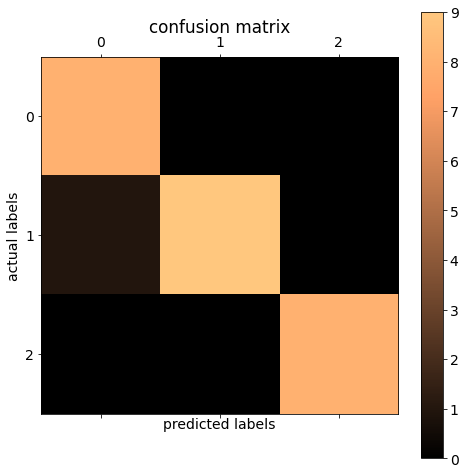

In [55]:
plt.matshow(confusion_matrix(knn_pred,y_test), cmap=plt.cm.copper, interpolation='nearest')
plt.title('confusion matrix')
plt.colorbar()
plt.ylabel('actual labels')
plt.xlabel('predicted labels')
plt.show()

In [56]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': knn_pred})  
df

,Actual,Predicted
0,1,1
30,0,0
69,0,0
1,1,1
71,2,2
95,2,2
46,1,1
26,1,1
79,2,2
9,1,1


In [57]:
pd.crosstab(y_test,knn_pred)

col_0,0,1,2
Trade,,,
0,8,1,0
1,0,9,0
2,0,0,8


In [58]:
import pickle

In [59]:
file = open('Stocks_price_predictions.pkl', 'wb')

In [60]:
pickle.dump(knn_pred, file)

In [ ]:
from flask import Flask,render_template,request
import pickle
import numpy as np

model = pickle.load(open('Trade_prediction.pkl', 'rb'))

app = Flask(__name__,template_folder='templates')



@app.route('/')
def home():
    return render_template('Home.html')


@app.route('/predict', methods=["GET","POST"])
def predict():
    data1 = request.form['a']
    data2 = request.form['b']
    data3 = request.form['c']
    data4 = request.form['d']
    data5 = request.form['e']
    data6 = request.form['f']
    data7 = request.form['g']
    data8 = request.form['h']
    data9 = request.form['i']
    data10 = request.form['j']
    data11 = request.form['k']
    data12 = request.form['l']
    data13 = request.form['m']
    data14 = request.form['n']
    data15 = request.form['o']
    data16 = request.form['p']
    data17 = request.form['q']
    data18 = request.form['r']
    arr = np.array([[data1, data2, data3, data4, data5, data6, data7, data8, data9, data10, data11, data12, data13, data14, data15, data16, data17, data18]])
    pred = model.predict(arr)
    if pred == 0:
        result = "BUY"
    elif pred == 1:
        result = "WAIT"
    else:
        result = "SELL"
    return render_template('Result.html', data=pred)


if __name__ == "__main__":
    app.run(debug=True,use_reloader=False)

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [30/May/2021 01:17:03] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [30/May/2021 01:17:04] "GET /static/flower1.jpg HTTP/1.1" 404 -
127.0.0.1 - - [30/May/2021 01:17:04] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [30/May/2021 01:19:28] "POST /predict HTTP/1.1" 500 -
Traceback (most recent call last):
  File "H:\STUDIES\ANACONDA\Lib\site-packages\flask\app.py", line 2464, in __call__
    return self.wsgi_app(environ, start_response)
  File "H:\STUDIES\ANACONDA\Lib\site-packages\flask\app.py", line 2450, in wsgi_app
    response = self.handle_exception(e)
  File "H:\STUDIES\ANACONDA\Lib\site-packages\flask\app.py", line 1867, in handle_exception
    reraise(exc_type, exc_value, tb)
  File "H:\STUDIES\ANACONDA\Lib\site-packages\flask\_compat.py", line 39, in reraise
    raise value
  File "H:\STUDIES\ANACONDA\Lib\site-packages\flask\app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "H:\S

In [ ]:
if pred == 0:
        result = "BUY"
    elif pred == 1:
        result = "WAIT"
    
        